In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("default_credit.xls")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [6]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Data Preprocessing

In [7]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [8]:
preprocessed_df = df.copy()

In [9]:
## Unique values in each categorical columns


print("Sex", preprocessed_df.sex.unique())
print('Education', preprocessed_df.education.unique())
print('Pay_0', preprocessed_df.pay_0.unique())
print('Marriage', preprocessed_df.marriage.unique())
print('Default', preprocessed_df.default_payment_next_month.unique())

Sex [2 1]
Education [2 1 3 5 4 6 0]
Pay_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
Marriage [1 2 3 0]
Default [1 0]


- The EDUCATION column has 7 unique values, but as per our data description, we have only 4 unique values, so we are going to club categories 0, 5, and 6 with category 4

In [10]:
fill = (df.education == 0) | (df.education == 5) | (df.education == 6)
preprocessed_df.loc[fill, 'education'] = 4
df.loc[fill, 'education'] = 4

In [11]:
fill = (df.marriage == 0)
preprocessed_df.loc[fill, 'marriage'] = 2
df.loc[fill, 'marriage'] = 2

In [12]:
preprocessed_df = preprocessed_df.rename(columns={'default_payment_next_month': 'default', 
                                                  'pay_0': 'pay_1'})
preprocessed_df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EDA

## Univariate Analysis

In [13]:
preprocessed_df.sex = preprocessed_df.sex.map({1:'Male', 2:'Female'})
preprocessed_df.default = preprocessed_df.default.map({0:'No', 1:'Yes'})

preprocessed_df.education = preprocessed_df.education.map({1:'Graduate School',
                                                          2:'University',
                                                          3:'High School',
                                                          4:'Others'})

preprocessed_df.marriage = preprocessed_df.marriage.map({1:'Married',
                                                        2:'Single',
                                                        3:'Divorced'})

In [14]:
def plot_categorical_count(df, col):
    
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=col)
    plt.show()
    
    print()
    print("Percentage share of each category:")
    print(df[col].value_counts(normalize=True)*100)

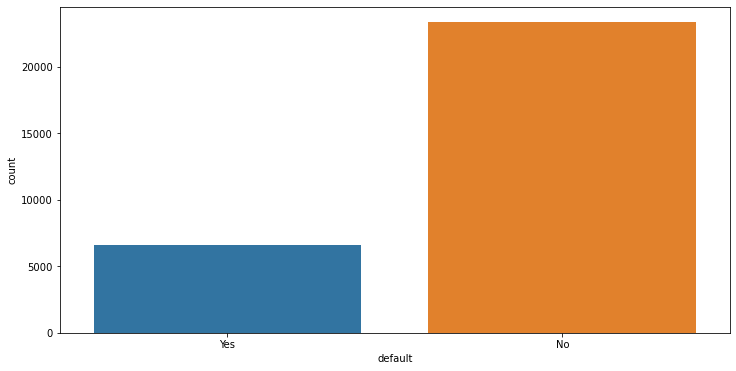


Percentage share of each category:
No     77.88
Yes    22.12
Name: default, dtype: float64


In [15]:
plot_categorical_count(preprocessed_df, 'default')

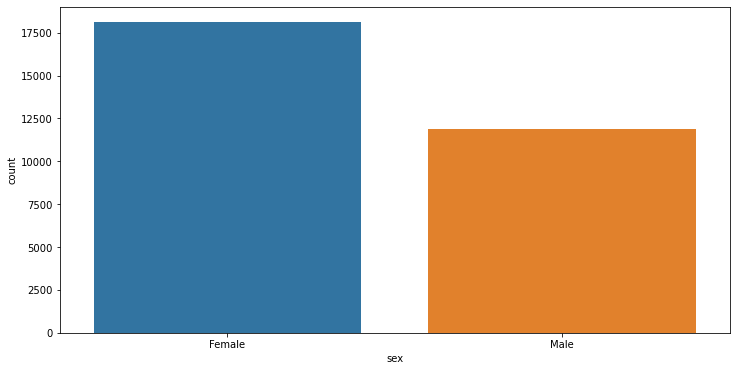


Percentage share of each category:
Female    60.373333
Male      39.626667
Name: sex, dtype: float64


In [16]:
plot_categorical_count(preprocessed_df, 'sex')

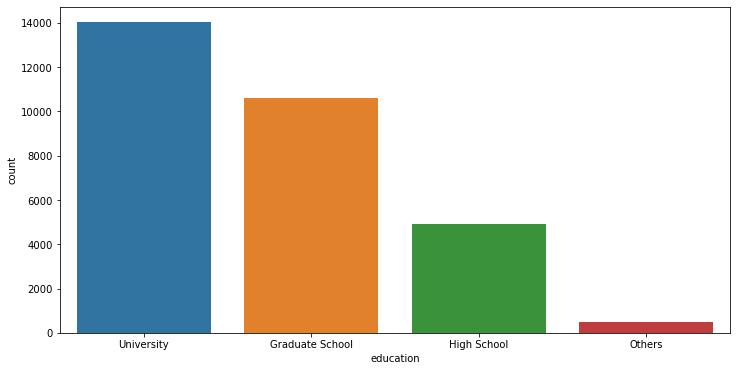


Percentage share of each category:
University         46.766667
Graduate School    35.283333
High School        16.390000
Others              1.560000
Name: education, dtype: float64


In [17]:
plot_categorical_count(preprocessed_df, 'education')

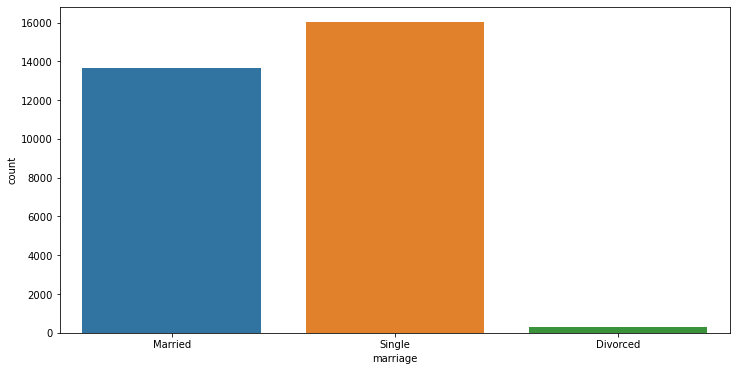


Percentage share of each category:
Single      53.393333
Married     45.530000
Divorced     1.076667
Name: marriage, dtype: float64


In [18]:
plot_categorical_count(preprocessed_df, 'marriage')

## Bivariate Analysis

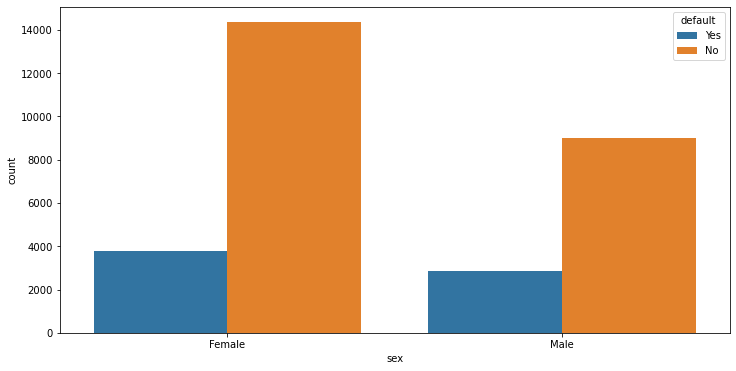

In [19]:
plt.rcParams['figure.figsize'] = [12,6]

sns.countplot(data=preprocessed_df, x='sex', hue='default')
plt.show()

In [20]:
## rechanging the default column mapping
preprocessed_df.default = preprocessed_df.default.map({'Yes':1, 'No':0})

In [21]:
pd.crosstab(index=preprocessed_df.sex, columns=preprocessed_df.default, normalize='index', margins=True)

default,0,1
sex,,
Female,0.792237,0.207763
Male,0.758328,0.241672
All,0.778800,0.221200


- around 24% of male customers have defaulted and around 20% of female customers have defaulted.

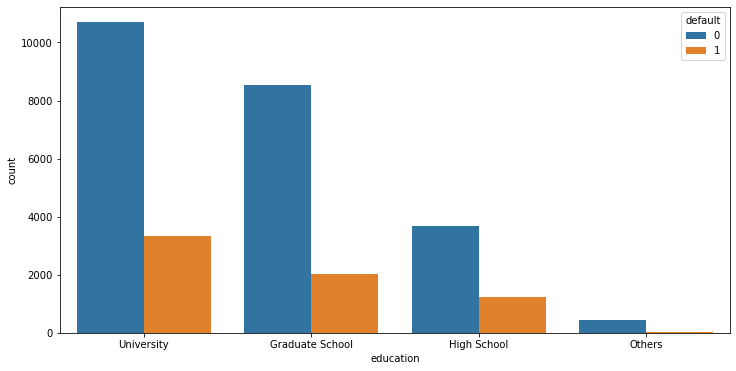

In [22]:
sns.countplot(data=preprocessed_df, x='education', hue='default')
plt.show()

In [23]:
pd.crosstab(index=preprocessed_df.education, columns=preprocessed_df.default)

default,0,1
education,,
Graduate School,8549,2036
High School,3680,1237
Others,435,33
University,10700,3330


In [24]:
pd.crosstab(index=preprocessed_df.education, columns=preprocessed_df.default, normalize='index', margins=True)

default,0,1
education,,
Graduate School,0.807652,0.192348
High School,0.748424,0.251576
Others,0.929487,0.070513
University,0.762651,0.237349
All,0.778800,0.221200


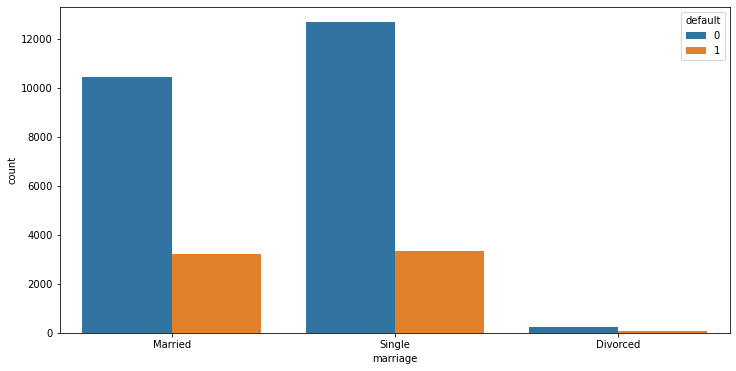

In [25]:
sns.countplot(data=preprocessed_df, x='marriage', hue='default')
plt.show()

In [26]:
pd.crosstab(index=preprocessed_df.marriage, columns=preprocessed_df.default)

default,0,1
marriage,,
Divorced,239,84
Married,10453,3206
Single,12672,3346


In [27]:
pd.crosstab(index=preprocessed_df.marriage, columns=preprocessed_df.default, normalize='index', margins=True)

default,0,1
marriage,,
Divorced,0.739938,0.260062
Married,0.765283,0.234717
Single,0.791110,0.208890
All,0.778800,0.221200


In [28]:
pd.crosstab(preprocessed_df.pay_1, preprocessed_df.default, margins=True)

default,0,1,All
pay_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


- we can see that the maximum count of defaults falls under subcategory 2—that is, a payment delay for the last 2 months. This implies that a customer who has missed payments for 2 continuous months has a high probability of default.

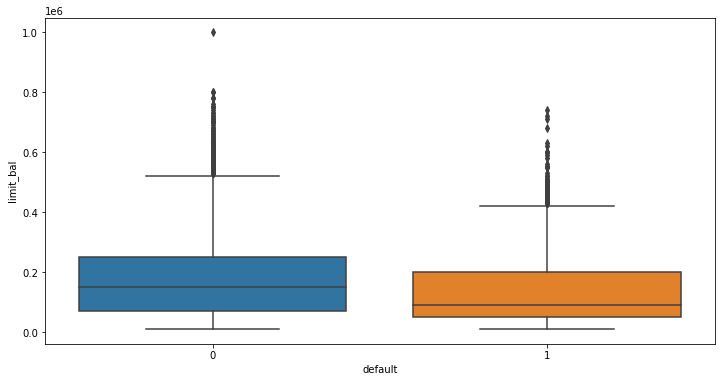

In [29]:
sns.boxplot(data=preprocessed_df, x='default', y='limit_bal')
plt.show()

- we can infer that customers with higher balances have a lower likelihood of default than customers with lower balance amounts.

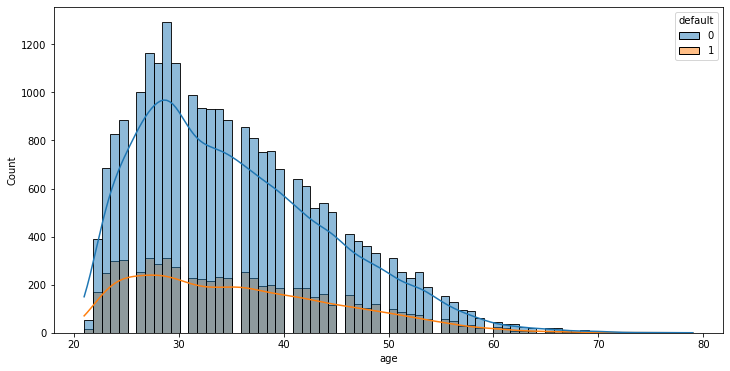

In [30]:
sns.histplot(data=preprocessed_df, x='age', hue='default', kde=True)
plt.show()

### Correlation

In [32]:
df.rename(columns={'default_payment_next_month':'default'}, inplace=True)

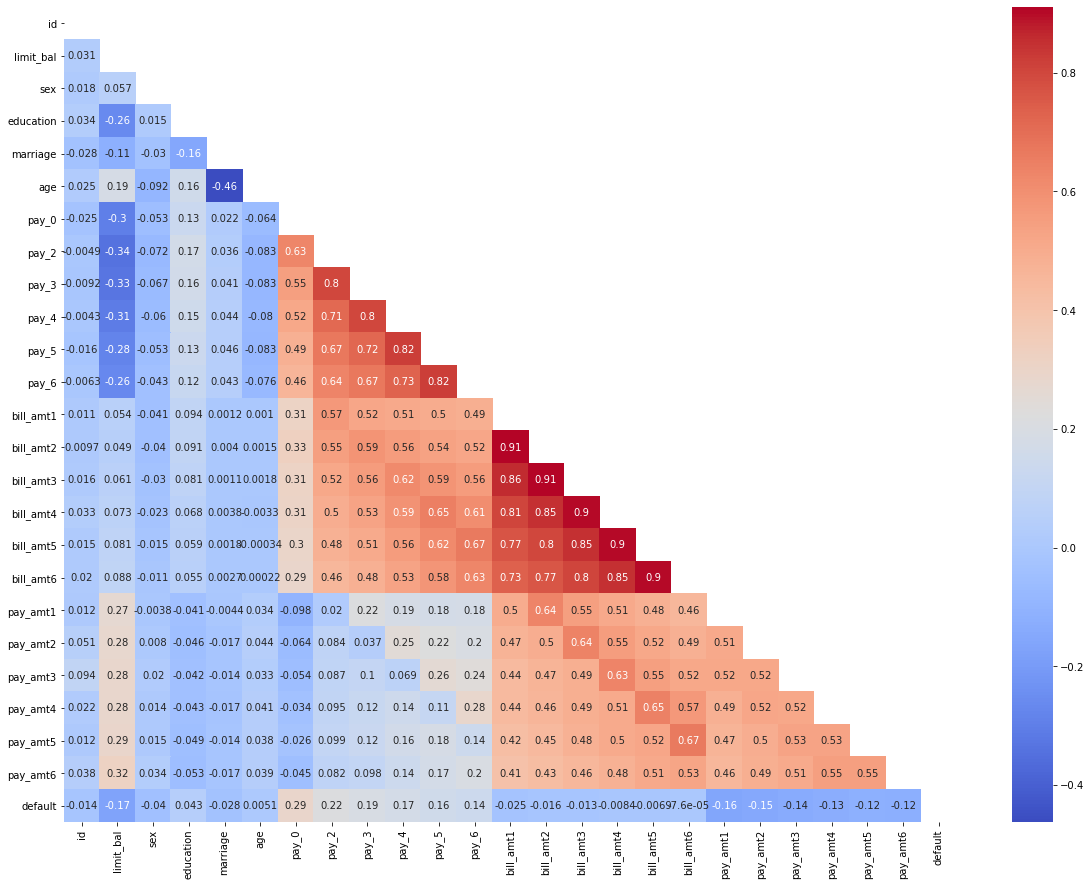

In [33]:
corr_matrix = df.corr(method='spearman')


plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.show()

In [35]:
corr_matrix.loc[:, 'default']

id          -0.013952
limit_bal   -0.169586
sex         -0.039961
education    0.043425
marriage    -0.028174
age          0.005149
pay_0        0.292213
pay_2        0.216919
pay_3        0.194771
pay_4        0.173690
pay_5        0.159043
pay_6        0.142523
bill_amt1   -0.025327
bill_amt2   -0.015554
bill_amt3   -0.012670
bill_amt4   -0.008357
bill_amt5   -0.006851
bill_amt6   -0.000076
pay_amt1    -0.160493
pay_amt2    -0.150977
pay_amt3    -0.139388
pay_amt4    -0.127979
pay_amt5    -0.116587
pay_amt6    -0.121444
default      1.000000
Name: default, dtype: float64

## Building a Profile of a High-Risk Customer

- A male customer is more likely to default than a female customer.
- People with a relationship status of other are more likely to default than married or single people.
- A customer whose highest educational qualification is a high-school diploma is more likely to default than a customer who has gone to graduate school or university.
- A customer who has delayed payment for 2 consecutive months has a higher probability of default.
- A customer who is 22 years of age has a higher probability of defaulting on payments than any other age group.